In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

Loading the data and removing unnecessary column from the dataframe

In [30]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\sm\project\4 Flight Booking Price Prediction\Flight_Booking.csv")
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [29]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [6]:
# Print Unique values of all columns.
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in flight: ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Unique values in source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in stops: ['zero' 'one' 'two_or_more']
Unique values in arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in class: ['Economy' 'Business']
Unique values in duration: [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.

In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Missing Values

In [8]:
# Checking out the missing values in a dataframe
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Data Visualization

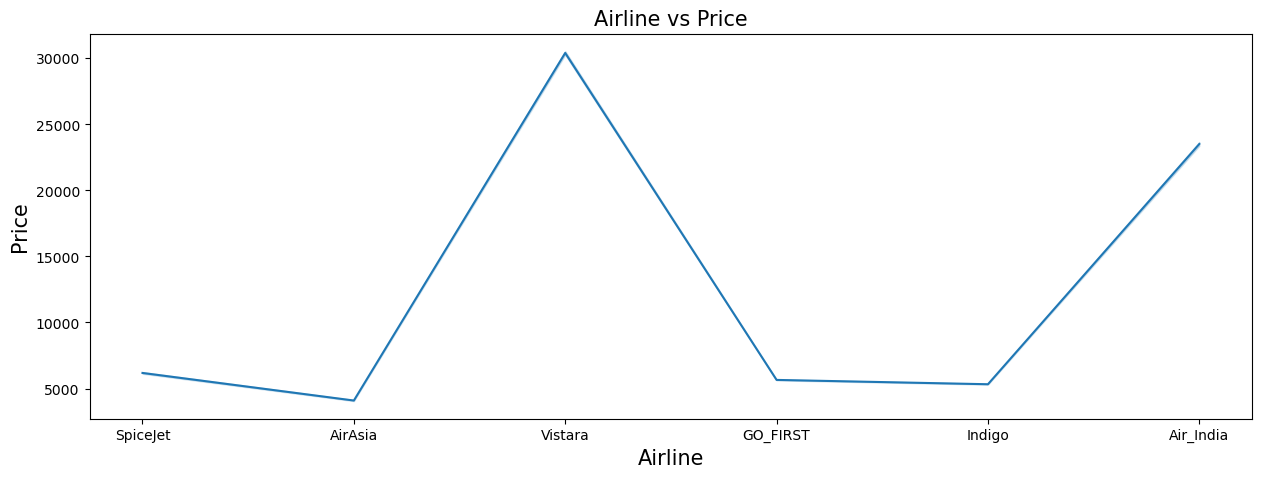

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 5))
sns.lineplot(x = df['airline'], y = df['price'])
plt.title("Airline vs Price", fontsize = 15)
plt.xlabel("Airline", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.show()

There is a variation in price with different airlines.

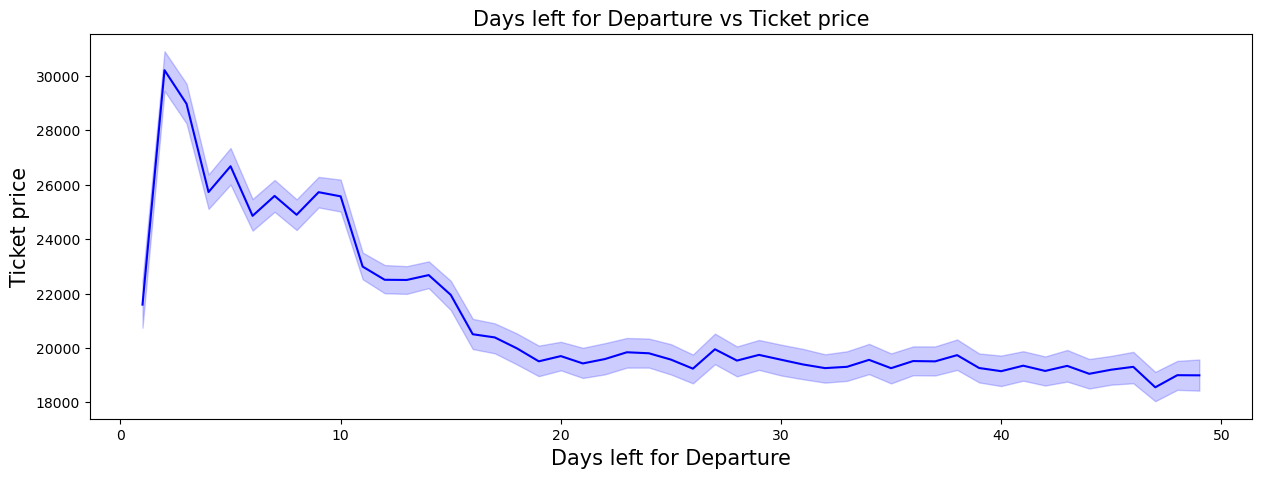

In [10]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = df['days_left'], y = df['price'], color = 'blue')
plt.title("Days left for Departure vs Ticket price", fontsize = 15)
plt.xlabel("Days left for Departure", fontsize = 15)
plt.ylabel("Ticket price", fontsize = 15)
plt.show()

The price of the ticket increases as the days left for departure decreases.

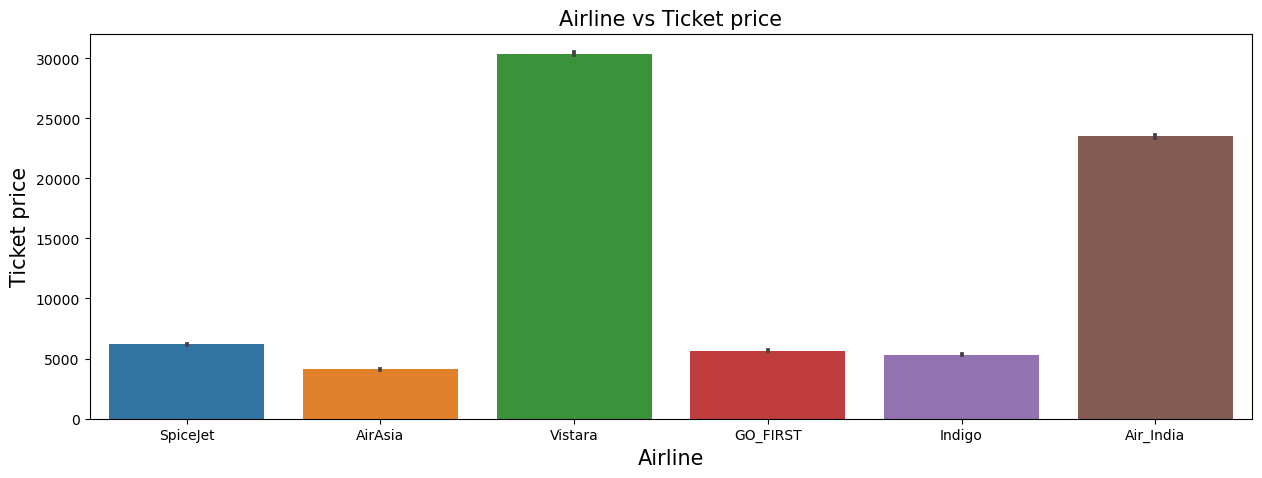

In [11]:
plt.figure(figsize = (15, 5))
sns.barplot(x = df['airline'], y = df['price'])
plt.title("Airline vs Ticket price", fontsize = 15)
plt.xlabel("Airline", fontsize = 15)
plt.ylabel("Ticket price", fontsize = 15)
plt.show()

Price range of all the flights

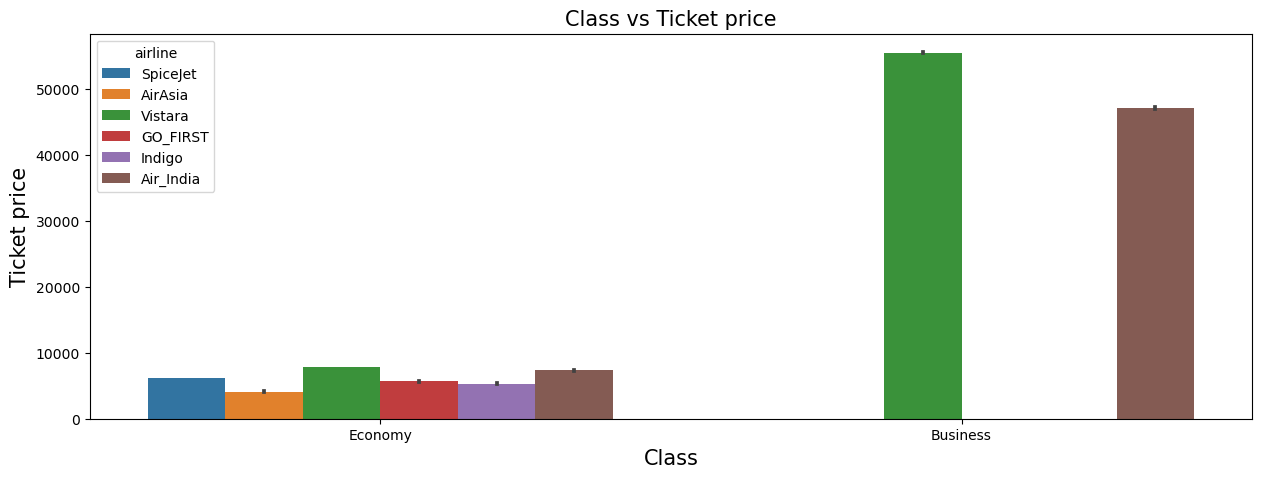

In [12]:
plt.figure(figsize = (15, 5))
sns.barplot(x = df['class'], y = df['price'], hue = 'airline', data = df)
plt.title("Class vs Ticket price", fontsize = 15)
plt.xlabel("Class", fontsize = 15)
plt.ylabel("Ticket price", fontsize = 15)
plt.show()

Range of price of all the flights of Economy and Business class.

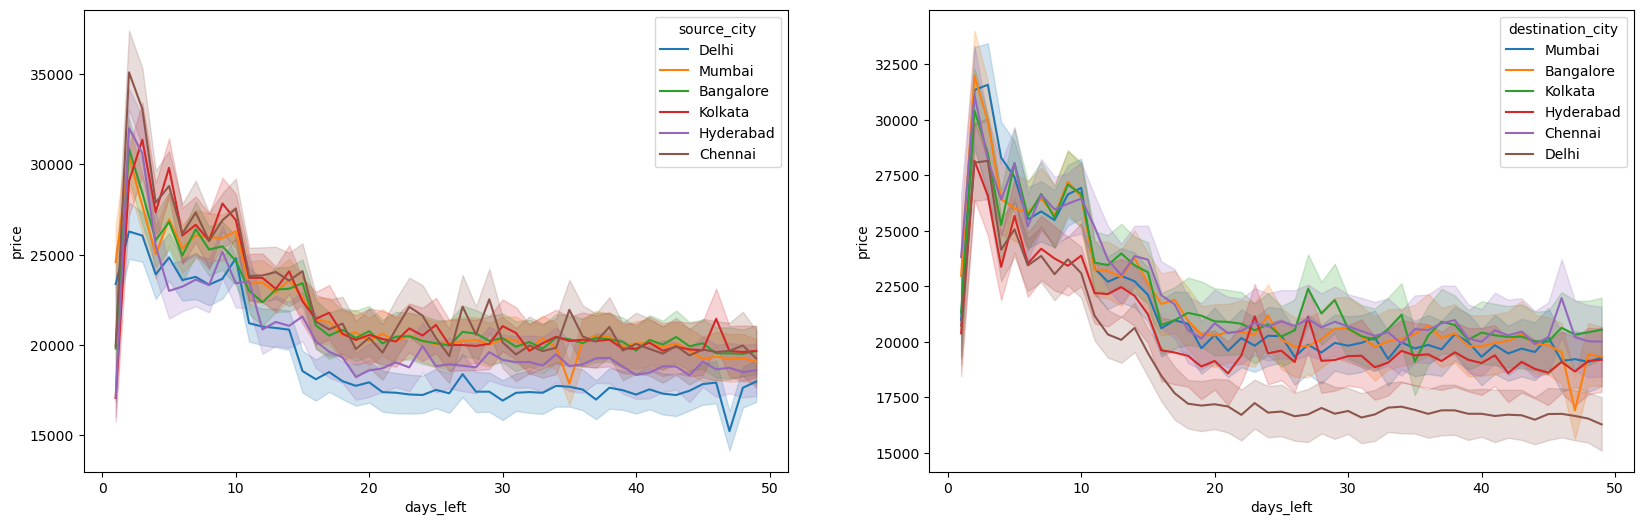

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'source_city', ax = ax[0])
sns.lineplot(x = 'days_left', y = 'price', data = df, hue = 'destination_city', ax = ax[1])
plt.show()

Range of price of flights with source and destination city according to the days left.

#### Visualization of categorical features with countplot

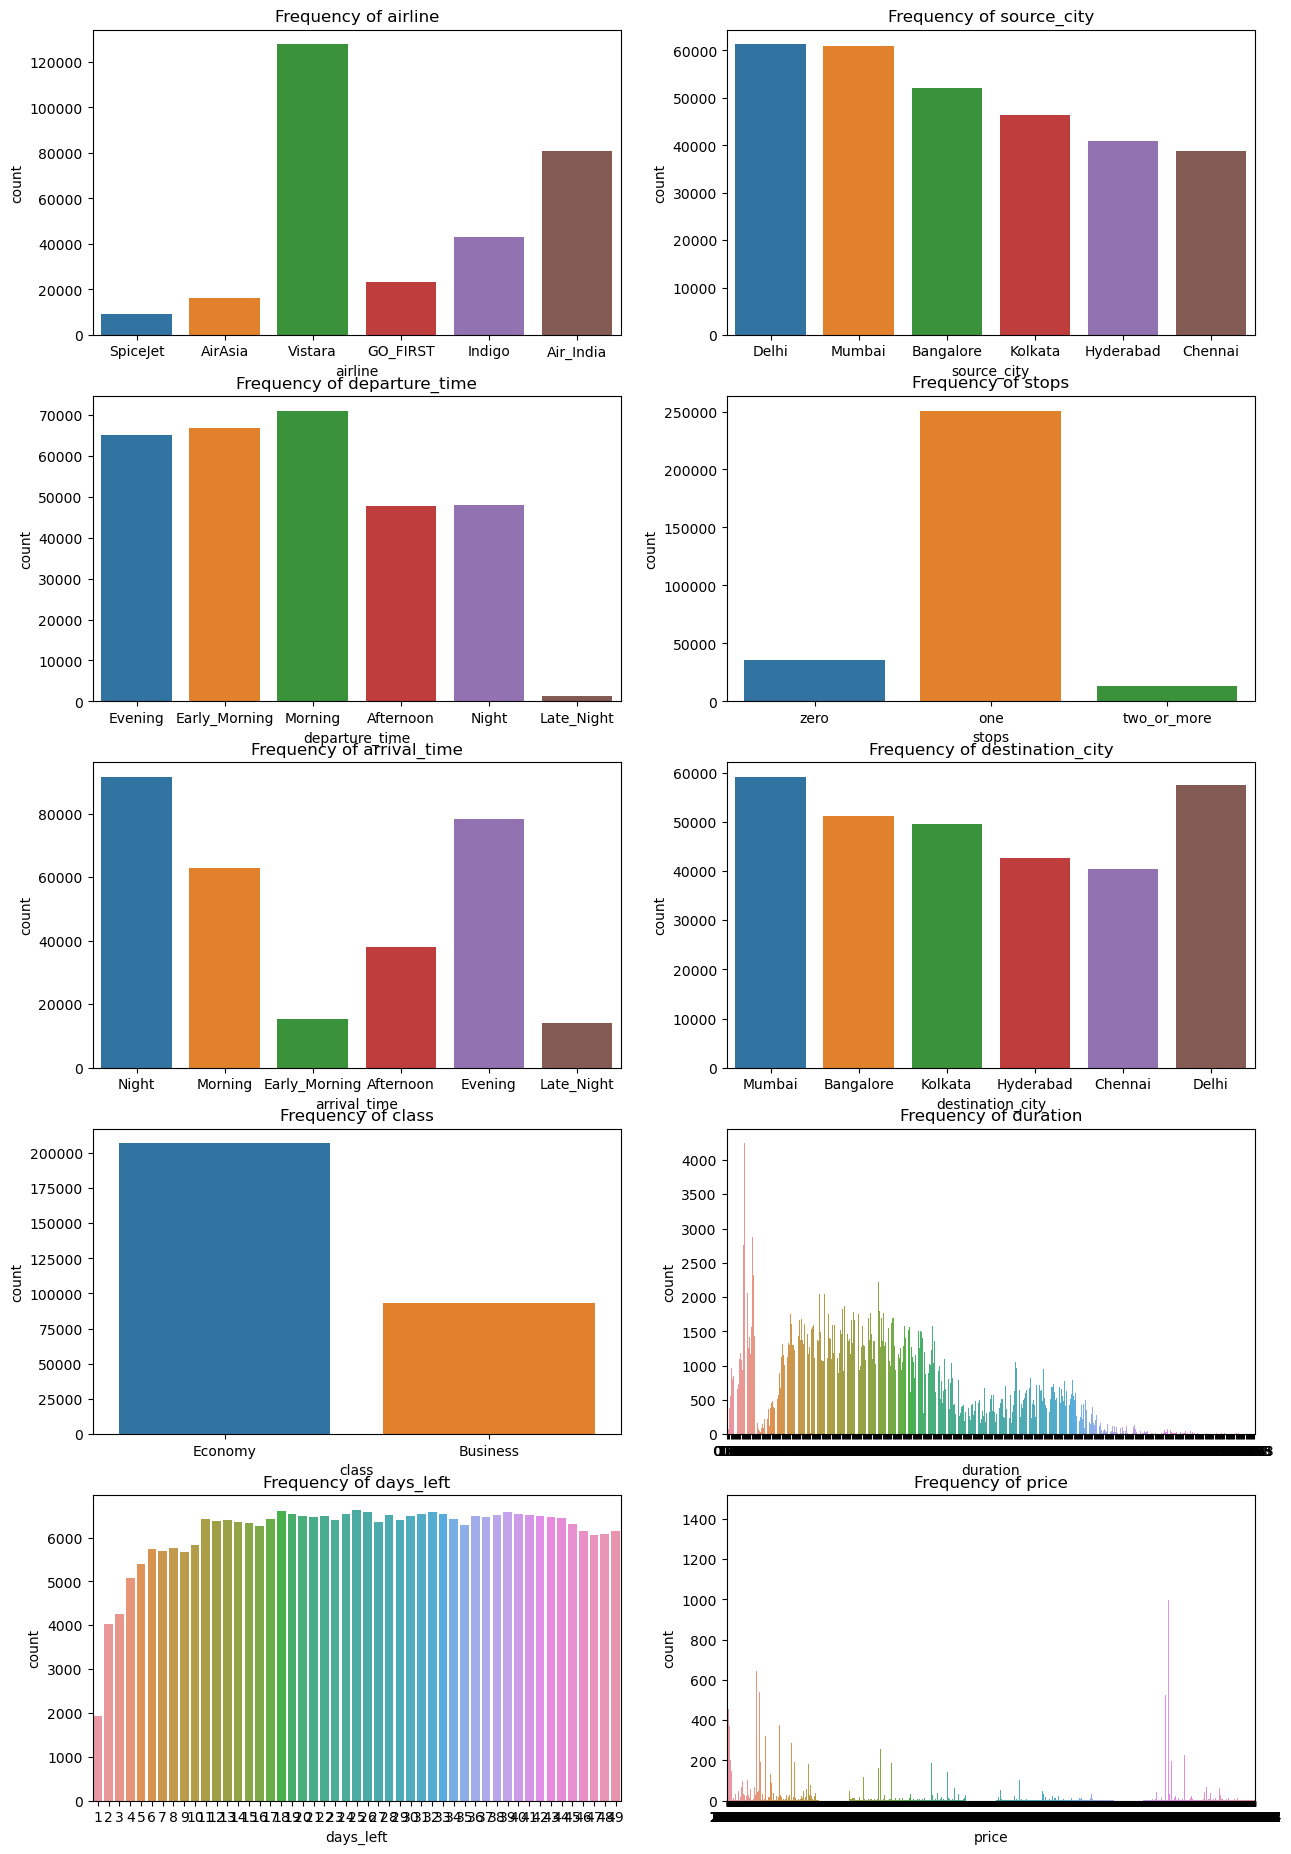

In [14]:
plt.figure(figsize = (15, 23))

plt.subplot(5, 2, 1)
sns.countplot(x = df['airline'], data = df)
plt.title("Frequency of airline")

plt.subplot(5, 2, 2)
sns.countplot(x = df['source_city'], data = df)
plt.title("Frequency of source_city")

plt.subplot(5, 2, 3)
sns.countplot(x = df['departure_time'], data = df)
plt.title("Frequency of departure_time")

plt.subplot(5, 2, 4)
sns.countplot(x = df['stops'], data = df)
plt.title("Frequency of stops")

plt.subplot(5, 2, 5)
sns.countplot(x = df['arrival_time'], data = df)
plt.title("Frequency of arrival_time")

plt.subplot(5, 2, 6)
sns.countplot(x = df['destination_city'], data = df)
plt.title("Frequency of destination_city")

plt.subplot(5, 2, 7)
sns.countplot(x = df['class'], data = df)
plt.title("Frequency of class")

plt.subplot(5, 2, 8)
sns.countplot(x = df['duration'], data = df)
plt.title("Frequency of duration")

plt.subplot(5, 2, 9)
sns.countplot(x = df['days_left'], data = df)
plt.title("Frequency of days_left")

plt.subplot(5, 2, 10)
sns.countplot(x = df['price'], data = df)
plt.title("Frequency of price")

plt.show()

#### Label Encoding
Performing One Hot Encoding for categorical features of a dataframe.

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['flight'] = le.fit_transform(df['flight'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


In [33]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


#### Feature Selection

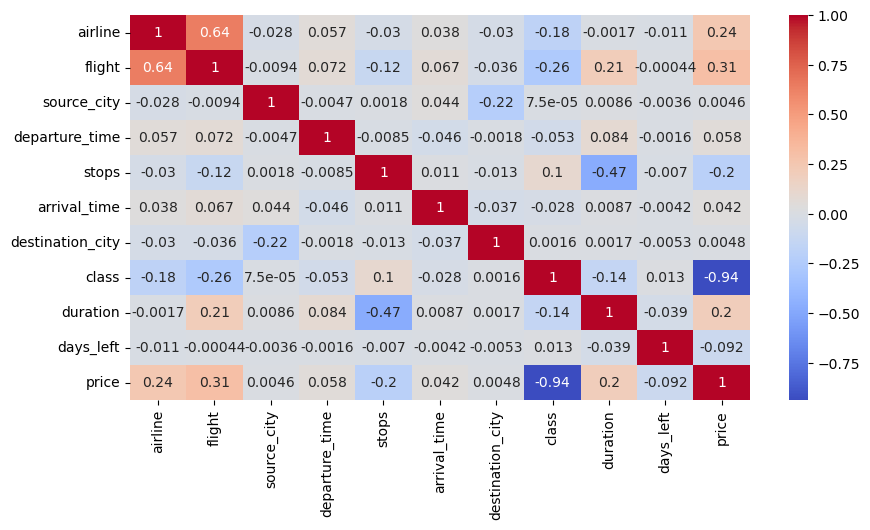

In [16]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

Plotting the correlation graph to see the correlation between features and dependent variable.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


Selecting the features using VIF. VIF should be less than 5. So drop the flight feature.

In [18]:
df = df.drop(columns = ['flight'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


Dropping the stops column. All features are having VIF less than 5.

##### Importing libraries to calculate r2 score,mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error.

In [19]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

#### Linear Regression
Applying standardization and implementing Linear Regression Model to predict the price of a flight.

In [20]:
import numpy as np

X = df.drop(columns = ['price'])
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Actual_Value', 'Predicted_value'])
difference

,Actual_Value,Predicted_value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [21]:
print(f"r2 score : {r2_score(y_test, y_pred)}")
print(f"mean_absolute_error : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"mean_squared_error : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"root_mean_squared_error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

r2 score : 0.904554350718816
mean_absolute_error : 4624.9948680168745
mean_absolute_percentage_error : 0.4353581089683267
mean_squared_error : 49200540.293721996
root_mean_squared_error : 7014.3096804833185


Root Mean square error(RMSE) of the Linear regression model is 7014.31 and Mean absolute percentage error(MAPE) is 43 percent.  
Lower the RMSE and MAPE better the model.

#### Plotting the graph of actual and predicted price of flight.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19984\361032174.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label = "Actual")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19984\361032174.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "Predicted")


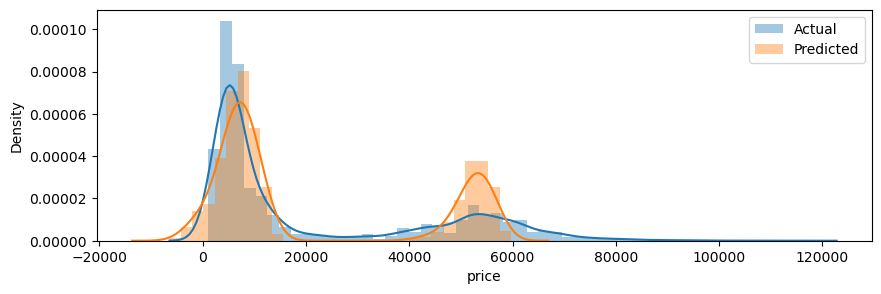

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 3))
sns.distplot(y_test, label = "Actual")
sns.distplot(y_pred, label = "Predicted")
plt.legend()
plt.show()

#### Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"r2 score : {r2_score(y_test, y_pred)}")
print(f"mean_absolute_error : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"mean_squared_error : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"root_mean_squared_error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

r2 score : 0.9754120740885853
mean_absolute_error : 1173.9469579606093
mean_absolute_percentage_error : 0.07354305385930167
mean_squared_error : 12674639.951159032
root_mean_squared_error : 3560.1460575598626


Mean absolute percentage error is 7.3 percent and RMSE is 3554 which is less than the linear regression model

#### Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print(f"r2 score : {r2_score(y_test, y_pred)}")
print(f"mean_absolute_error : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"mean_squared_error : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"root_mean_squared_error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

r2 score : 0.9849738392604813
mean_absolute_error : 1089.8362698423934
mean_absolute_percentage_error : 0.07049197507060898
mean_squared_error : 7745719.501018427
root_mean_squared_error : 2783.113274916856


Mean absolute percentage error is 7.0 percent and RMSE is 2785 which is less than the linear regression and decision tree model.